In [1]:
import numpy as np
from PIL import Image, ImageSequence
import matplotlib.pyplot as plt

from pathlib import Path
import os

figures_path = Path(os.getcwd()) / "figures" / "star_sim"

# July 18 data

In [58]:
img_path = Path(os.getcwd()) / "source_files" / 'July18' / 'July18'

In [26]:
## Load Frames for ds1
n = 100
im = np.asarray(Image.open(img_path/'calibrate2895_1.bmp') )
ds1 =np.zeros((n,len(im),len(im)))

for i in range(n):
    img_name = 'calibrate2895_'+str(i+1)+'.bmp'
    ds1[i] = np.asarray(Image.open(img_path/img_name))

print(ds1.shape)

(100, 2000, 2000)


In [27]:
## Load Frames for ds2
n = 100
im = np.asarray(Image.open(img_path/'calibrate5790_1.bmp') )
ds2 =np.zeros((n,len(im),len(im)))

for i in range(n):
    img_name = 'calibrate5790_'+str(i+1)+'.bmp'
    ds2[i] = np.asarray(Image.open(img_path/img_name))

print(ds2.shape)

(100, 2000, 2000)


In [32]:
## Load Frames for ds3
n = 100
im = np.asarray(Image.open(img_path/'calibrate39_1.bmp') )
ds3 =np.zeros((n,len(im),len(im)))

for i in range(n):
    img_name = 'calibrate39_'+str(i+1)+'.bmp'
    ds3[i] = np.asarray(Image.open(img_path/img_name))

print(ds3.shape)

(100, 2000, 2000)


(2000, 2000)


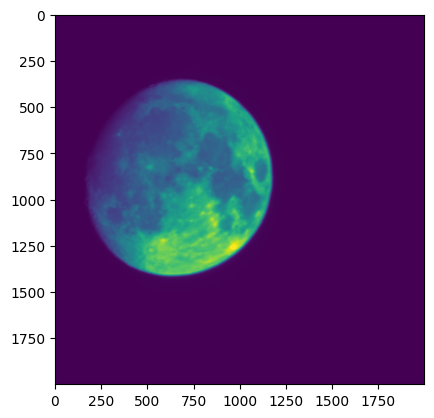

In [52]:
im = np.asarray(Image.open(img_path/'moon_1.bmp') )
print(im.shape)
plt.imshow(im)


ds1 mean = 0.05460163
ds2 mean = 0.0552654
ds2 mean = 0.0483598675


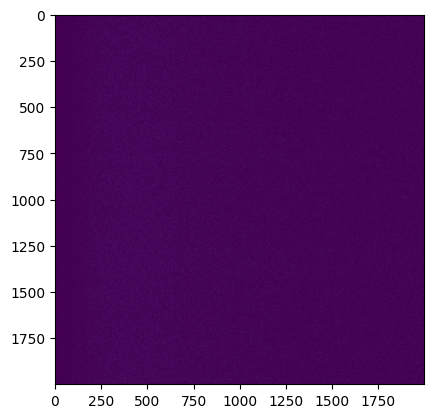

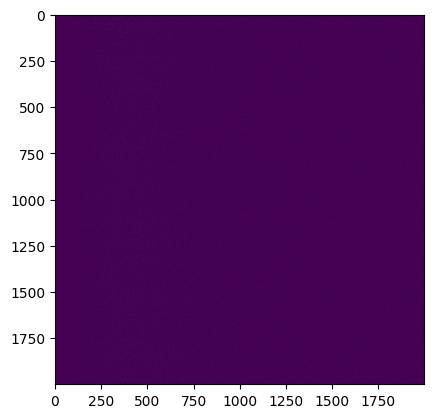

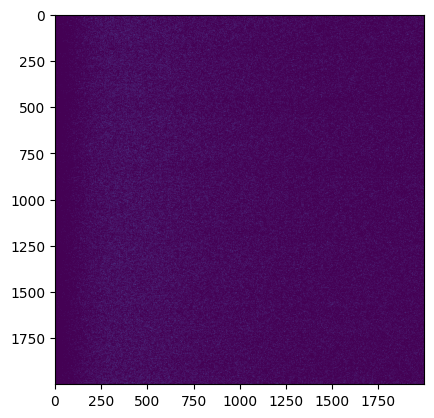

In [34]:
print(f'ds1 mean = {ds1.mean()}')
print(f'ds2 mean = {ds2.mean()}')
print(f'ds2 mean = {ds3.mean()}')

plt.imshow(ds1[5])
plt.show()
plt.imshow(ds2[5])
plt.show()
plt.imshow(ds3[5])
plt.show()



In [43]:
## calculate the mean and var for each pixle across the dataset 1
ds1_avg = np.mean(ds1,0)
ds1_var = np.var(ds1,0)

## calculate the mean and var for each pixle across the dataset 2
ds2_avg = np.mean(ds2,0)
ds2_var = np.var(ds2,0)

test = np.subtract(ds2_avg,ds1_avg)

In [57]:
test = np.subtract(ds2_var,ds1_var)
test2 = np.subtract(ds2_avg,ds1_avg)

print(np.divide(test,test2))

[[ nan  nan  nan ... 0.93 0.93  nan]
 [ nan  nan 0.99 ... 0.93 0.87 0.94]
 [ nan  nan  nan ... -inf 0.95 0.93]
 ...
 [ nan  nan 0.99 ... 0.92 -inf 0.9 ]
 [ nan  nan  nan ... -inf 0.95 0.92]
 [ nan 0.99  nan ... 0.91 0.93 0.87]]


C:\Users\Pat\AppData\Local\Temp\ipykernel_27592\3889060443.py:4: RuntimeWarning: divide by zero encountered in divide
  print(np.divide(test,test2))
C:\Users\Pat\AppData\Local\Temp\ipykernel_27592\3889060443.py:4: RuntimeWarning: invalid value encountered in divide
  print(np.divide(test,test2))


In [49]:
## calculate the mean and var for each pixle across the dataset 1
ds1_avg = np.mean(ds1,0)
ds1_var = np.var(ds1,0)

## calculate the mean and var for each pixle across the dataset 2
ds2_avg = np.mean(ds2,0)
ds2_var = np.var(ds2,0)

test = np.subtract(ds2_avg,ds1_avg)
test = np.subtract(ds2_var,ds1_var)
test2 = np.subtract(ds2_avg,ds1_avg)

print(np.divide(test,test2))
## calculate the mean and var for each pixle across the dataset 1
ds1_avg = np.mean(ds1,0)
ds1_var = np.var(ds1,0)

## calculate the mean and var for each pixle across the dataset 2
ds2_avg = np.mean(ds2,0)
ds2_var = np.var(ds2,0)

## calculate the gain using SANUC
g = np.divide(np.subtract(ds2_var,ds1_var),np.subtract(ds2_avg,ds1_avg)+0.0001)

## calculate mean photo count
k_bar = np.divide(np.subtract(ds2_avg,ds1_avg)+0.0001,g)

## calculate bias for each pix
B = np.subtract(ds1_avg, np.multiply(g,k_bar))


## calculate the mean and var for each pixle across the dataset 3
ds3_avg = np.mean(ds3,0)

## Take median bias and gain as the values
B = (np.median(B))    ## Bias = 47.81999999999999
g = (np.median(g))    ## Gain = 0.7854179331756801
print("Bias = "+str(B))
print("Gain = "+str(g))


## Validate that dataset 2 is 2x the photo count of dataset 1,
## dataset3 is 20x the photo count of dataset 1, and dataset 3
## is 10x the photocount of dataset 2.
ds1_mean = np.mean(ds1_avg)
ds2_mean = np.mean(ds2_avg)
ds3_mean = np.mean(ds3_avg)
test1 = ((ds1_mean-B)/g)
test2 = ((ds2_mean-B)/g)
test3 = ((ds3_mean-B)/g)
diff1 = str(test2/test1)
diff2 = str(test3/test1)  
diff3 = str(test3/test2)  
print("Dataset 2 has "+diff1+" more photons than the dataset 1")
print("Dataset 3 has "+diff2+" more photons than the dataset 1")
print("Dataset 3 has "+diff3+" more photons than the dataset 2")

## Predict average photocount of dataset 4 (40ms exposure)
predict1 = test1 * 40.0 ## 6673.740614511226
predict2 = test2 * 20.0 ## 6670.612445550191
predict3 = test3 * 2.0 ## 6491.932993411159
predict_avg = (predict1 + predict2 + predict3)/3.0 ## About 6612.095351157525 photo electrons
print("Dataset 4 Photocount Prediction ~= " + str(predict_avg) + "photo electrons")



C:\Users\Pat\AppData\Local\Temp\ipykernel_27592\3607639062.py:13: RuntimeWarning: divide by zero encountered in divide
  k_bar = np.divide(np.subtract(ds2_avg,ds1_avg)+0.0001,g)
C:\Users\Pat\AppData\Local\Temp\ipykernel_27592\3607639062.py:16: RuntimeWarning: invalid value encountered in multiply
  B = np.subtract(ds1_avg, np.multiply(g,k_bar))


Bias = nan
Gain = 0.8811881188118766
5790us dataset has nan more photons than the 2895us dataset
39ms dataset has nan more photons than the 2895us dataset
39ms dataset has nan more photons than the 5790us dataset
Dataset 4 Photocount Prediction ~= nanphoto electrons


# July 10 Data

In [2]:
img_path = Path(os.getcwd()) / "source_files" / 'July10_2024' / 'July10_2024'

In [3]:
## Load Frames for ds1
n = 100
im = np.asarray(Image.open(img_path/'calibrate18266_1.bmp') )
ds1 =np.zeros((n,len(im),len(im)))

for i in range(n):
    img_name = 'calibrate18266_'+str(i+1)+'.bmp'
    ds1[i] = np.asarray(Image.open(img_path/img_name))

print(ds1.shape)

(100, 2000, 2000)


In [4]:
## Load Frames for ds2
n = 100
im = np.asarray(Image.open(img_path/'calibrate9133_1.bmp') )
ds2 =np.zeros((n,len(im),len(im)))

for i in range(n):
    img_name = 'calibrate9133_'+str(i+1)+'.bmp'
    ds2[i] = np.asarray(Image.open(img_path/img_name))

print(ds2.shape)

(100, 2000, 2000)


In [5]:
## Load Frames for ds3
n = 100
im = np.asarray(Image.open(img_path/'calibrate10_1.bmp') )
ds3 =np.zeros((n,len(im),len(im)))

for i in range(n):
    img_name = 'calibrate10_'+str(i+1)+'.bmp'
    ds3[i] = np.asarray(Image.open(img_path/img_name))

print(ds3.shape)

(100, 2000, 2000)


In [7]:
## calculate the mean and var for each pixle across the dataset 1
ds1_avg = np.mean(ds1,0)
ds1_var = np.var(ds1,0)

## calculate the mean and var for each pixle across the dataset 2
ds2_avg = np.mean(ds2,0)
ds2_var = np.var(ds2,0)

test = np.subtract(ds2_avg,ds1_avg)
test = np.subtract(ds2_var,ds1_var)
test2 = np.subtract(ds2_avg,ds1_avg)

print(np.divide(test,test2))
## calculate the mean and var for each pixle across the dataset 1
ds1_avg = np.mean(ds1,0)
ds1_var = np.var(ds1,0)

## calculate the mean and var for each pixle across the dataset 2
ds2_avg = np.mean(ds2,0)
ds2_var = np.var(ds2,0)

## calculate the gain using SANUC
g = np.divide(np.subtract(ds2_var,ds1_var),np.subtract(ds2_avg,ds1_avg)+0.0001)

## calculate mean photo count
k_bar = np.divide(np.subtract(ds2_avg,ds1_avg)+0.0001,g)

## calculate bias for each pix
B = np.subtract(ds1_avg, np.multiply(g,k_bar))


## calculate the mean and var for each pixle across the dataset 3
ds3_avg = np.mean(ds3,0)

## Take median bias and gain as the values
B = (np.median(B))    ## Bias = 47.81999999999999
g = (np.median(g))    ## Gain = 0.7854179331756801
print("Bias = "+str(B))
print("Gain = "+str(g))


## Validate that dataset 2 is 2x the photo count of dataset 1,
## dataset3 is 20x the photo count of dataset 1, and dataset 3
## is 10x the photocount of dataset 2.
ds1_mean = np.mean(ds1_avg)
ds2_mean = np.mean(ds2_avg)
ds3_mean = np.mean(ds3_avg)
test1 = ((ds1_mean-B)/g)
test2 = ((ds2_mean-B)/g)
test3 = ((ds3_mean-B)/g)
diff1 = str(test2/test1)
diff2 = str(test3/test1)  
diff3 = str(test3/test2)  
print("Dataset 2 has "+diff1+" more photons than the dataset 1")
print("Dataset 3 has "+diff2+" more photons than the dataset 1")
print("Dataset 3 has "+diff3+" more photons than the dataset 2")

## Predict average photocount of dataset 4 (40ms exposure)
predict1 = test1 * 40.0 ## 6673.740614511226
predict2 = test2 * 20.0 ## 6670.612445550191
predict3 = test3 * 2.0 ## 6491.932993411159
predict_avg = (predict1 + predict2 + predict3)/3.0 ## About 6612.095351157525 photo electrons
print("Dataset 4 Photocount Prediction ~= " + str(predict_avg) + "photo electrons")



C:\Users\Pat\AppData\Local\Temp\ipykernel_20960\1443483140.py:13: RuntimeWarning: divide by zero encountered in divide
  print(np.divide(test,test2))
C:\Users\Pat\AppData\Local\Temp\ipykernel_20960\1443483140.py:13: RuntimeWarning: invalid value encountered in divide
  print(np.divide(test,test2))


[[ 0.99        0.99        0.98       ...  0.59        0.82666667
   0.62      ]
 [        nan  0.97        0.94       ...  0.57        0.6
   0.62      ]
 [ 0.98        0.93        0.96       ...  0.57        0.72
   0.69      ]
 ...
 [        nan         nan         inf ...  0.76        0.82
   0.73      ]
 [ 0.99        0.99               nan ...  0.71        0.74
   0.82      ]
 [ 0.97        0.99        0.97       ... -0.18        0.75
   0.69      ]]


C:\Users\Pat\AppData\Local\Temp\ipykernel_20960\1443483140.py:26: RuntimeWarning: divide by zero encountered in divide
  k_bar = np.divide(np.subtract(ds2_avg,ds1_avg)+0.0001,g)
C:\Users\Pat\AppData\Local\Temp\ipykernel_20960\1443483140.py:29: RuntimeWarning: invalid value encountered in multiply
  B = np.subtract(ds1_avg, np.multiply(g,k_bar))


Bias = nan
Gain = 0.6410684474123552
Dataset 2 has nan more photons than the dataset 1
Dataset 3 has nan more photons than the dataset 1
Dataset 3 has nan more photons than the dataset 2
Dataset 4 Photocount Prediction ~= nanphoto electrons


# Aug 9 Data

In [11]:
img_path = Path(os.getcwd()) / "source_files" / 'August9' / 'August9' 
n = 200

In [12]:
## Load Frames for ds1

im = np.asarray(Image.open(img_path/'calibrate10000_1.bmp') )
ds1 =np.zeros((n,len(im),len(im)))

for i in range(n):
    img_name = 'calibrate10000_'+str(i+1)+'.bmp'
    ds1[i] = np.asarray(Image.open(img_path/img_name))

print(ds1.shape)

(200, 2000, 2000)


In [13]:
## Load Frames for ds2

im = np.asarray(Image.open(img_path/'calibrate20000_1.bmp') )
ds2 =np.zeros((n,len(im),len(im)))

for i in range(n):
    img_name = 'calibrate20000_'+str(i+1)+'.bmp'
    ds2[i] = np.asarray(Image.open(img_path/img_name))

print(ds2.shape)

(200, 2000, 2000)


In [14]:
## Load Frames for ds3

im = np.asarray(Image.open(img_path/'calibrate39_1.bmp') )
ds3 =np.zeros((n,len(im),len(im)))

for i in range(n):
    img_name = 'calibrate39_'+str(i+1)+'.bmp'
    ds3[i] = np.asarray(Image.open(img_path/img_name))

print(ds3.shape)

(200, 2000, 2000)


In [19]:
## calculate the mean and var for each pixle across the dataset 1
ds1_avg = np.mean(ds1,0)
ds1_var = np.var(ds1,0)

## calculate the mean and var for each pixle across the dataset 2
ds2_avg = np.mean(ds2,0)
ds2_var = np.var(ds2,0)

## calculate the mean diff
diff_avg_21 = np.subtract(ds2_avg,ds1_avg)
diff_var_21 = np.subtract(ds2_var,ds1_var)

# masks to throw out 
mask = np.zeros(ds2_avg.shape)
mask[diff_avg_21==0] = 1
mask_inv = (1-mask)

## calculate the gain using SANUC
g = mask_inv*np.divide(diff_var_21,diff_avg_21 + mask)
g = (np.median(g))  

## calculate mean photo count
k_bar = mask_inv*np.divide(diff_avg_21+mask,g)

## calculate bias for each pix
B = np.subtract(ds1_avg, np.multiply(g,k_bar))


## calculate the mean and var for each pixle across the dataset 3
ds3_avg = np.mean(ds3,0)

## Take median bias and gain as the values
B = (np.median(B))    
g = (np.median(g))    
print("Bias = "+str(B))
print("Gain = "+str(g))


## Validate that dataset 2 is 2x the photo count of dataset 1,
## dataset3 is 20x the photo count of dataset 1, and dataset 3
## is 10x the photocount of dataset 2.
ds1_mean = np.mean(ds1_avg)
ds2_mean = np.mean(ds2_avg)
ds3_mean = np.mean(ds3_avg)
test1 = ((ds1_mean-B)/g)
test2 = ((ds2_mean-B)/g)
test3 = ((ds3_mean-B)/g)
diff1 = str(test2/test1)
diff2 = str(test3/test1)  
diff3 = str(test3/test2)  
print("Dataset 2 has "+diff1+" more photons than the dataset 1")
print("Dataset 3 has "+diff2+" more photons than the dataset 1")
print("Dataset 3 has "+diff3+" more photons than the dataset 2")

## Predict average photocount of dataset 4 (40ms exposure)
predict1 = test1 * 40.0 ## 6673.740614511226
predict2 = test2 * 20.0 ## 6670.612445550191
predict3 = test3 * 2.0 ## 6491.932993411159
predict_avg = (predict1 + predict2 + predict3)/3.0 ## About 6612.095351157525 photo electrons
print("Dataset 4 Photocount Prediction ~= " + str(predict_avg) + "photo electrons")



Bias = 0.04
Gain = 0.9099999999999988
Dataset 2 has 1.1938010586441228 more photons than the dataset 1
Dataset 3 has 0.4101676715204825 more photons than the dataset 1
Dataset 3 has 0.3435812596667794 more photons than the dataset 2
Dataset 4 Photocount Prediction ~= 0.0887194111721611photo electrons


In [31]:
print(test3)

0.0016874134615384622
